In [2]:
import yfinance as yf

get = yf.Ticker('BTC-USD')
df = get.history(period='10y')


In [3]:
data = df.reset_index()

In [4]:
date = data['Date']

In [5]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,66006.742188,66402.187500,65871.773438,66191.000000,14121265576,0.0,0.0
2024-06-16 00:00:00+00:00,66189.359375,66894.843750,66018.250000,66639.046875,13281140541,0.0,0.0
2024-06-17 00:00:00+00:00,66636.515625,67188.320312,65094.964844,66490.296875,30006354476,0.0,0.0


In [6]:
# data['lag1'] = df['Close'].shift(1)
# data['lag2'] = df['Close'].shift(2)
# data['lag3'] = df['Close'].shift(3)
# # df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [7]:
import pandas as pd
import numpy as np
date = data['Date']
X = data[['Close']]
y = X[1:]
X = X[:-1]

In [8]:
print(len(X),len(y))

3563 3563


In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8, shuffle=False)

In [10]:
q80 = int(len(date)*0.8)
date_train = date[:q80]
date_test = date[q80:]

In [11]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = LR.predict(x_test)

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

619.17154082583
1059205.3665058652
0.9960117772191664


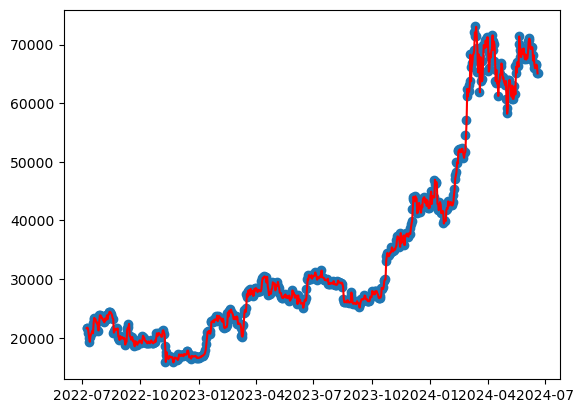

In [14]:
import matplotlib.pyplot as plt

plt.scatter(date_test,y_test)
plt.plot(date_test,y_pred, color='red')

In [15]:
import pickle

file = open('LR.pickle','wb')
pickle.dump(LR,file)
file.close()